# Integrated Simulations

In [1]:
# To manipulate arrays
import pandas as pd
import pathlib
import sys
import matplotlib.pyplot as plt 

# Plotting
current_dir = pathlib.Path().absolute()
rsnaped_dir = current_dir.parents[0].joinpath('rsnaped')
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp
import numpy as np
from ipywidgets import  VBox 


In [2]:

# Defining directories
#video_dir = current_dir.parents[0].joinpath('/home/luisub/Desktop/rsnaped/DataBases/20231026_2')
#video_dir = current_dir.parents[0].joinpath('/home/luisub/Desktop/rsnaped/DataBases/20231026_9')
video_dir = current_dir.parents[0].joinpath('/home/luisub/Desktop/rsnaped/DataBases/KDM5B_Translation_SampleMovies')
#video_dir = current_dir.parents[0].joinpath('DataBases','Hela')


In [3]:
# Load videos 
path_files, list_files_paths, list_videos, num_videos = rsp.Utilities.read_files_in_directory(directory=video_dir, extension_of_files_to_look_for = 'tif',return_images_in_list=True)

max_frames_to_read = 20
#list_videos[0] = list_videos[0][0:max_frames_to_read,:,:,:]
selected_video = list_videos[0][0:max_frames_to_read,:,:,:]

#list_videos[0] = np.max(list_videos[0],axis=1)

In [4]:
list_videos[0].shape


(300, 2, 512, 512)

In [5]:
# converting the video to standard format
selected_video = rsp.ConvertToStandardFormat(video=list_videos[0], time_position = 0, height_position = 2,  width_position = 3, channel_position = 1 ).transpose_video()
selected_video.shape
        

The video has been transposed to the format [T, Y, X, C] and the channels are RGB


(300, 512, 512, 3)

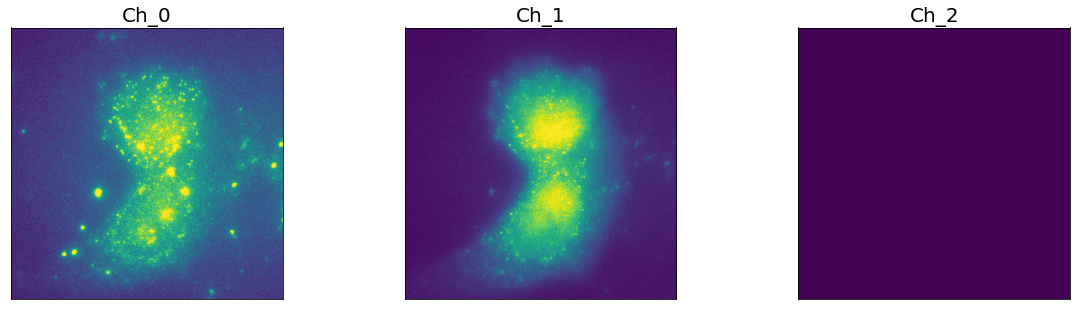

In [6]:
num_colors = selected_video.shape[-1]
_, axes = plt.subplots(nrows = 1, ncols = num_colors, figsize = (20, 5))
for i in range (0, num_colors):
    temp_img =rsp.RemoveExtrema(selected_video[0,:,:,i], min_percentile = 0.5, max_percentile = 99).remove_outliers()
    axes[i].imshow(temp_img)
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title('Ch_'+str(i), fontsize=20 )

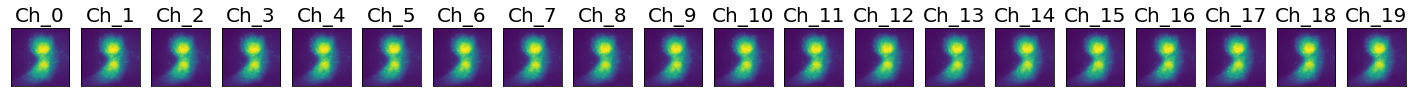

In [7]:
number_time_points = selected_video.shape[0]
number_time_points = 20
selected_channel = 1
_, axes = plt.subplots(nrows = 1, ncols = number_time_points, figsize = (25, 6))
for i in range (0, number_time_points):
    temp_img =rsp.RemoveExtrema(selected_video[i,:,:,selected_channel], min_percentile = 0.5, max_percentile = 99).remove_outliers()
    axes[i].imshow(temp_img)
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title('Ch_'+str(i), fontsize=20 )

In [8]:
# Plot only selected trajectories
#plt.rcParams['figure.figsize'] = [5,5]
tensor_video_expanded =rsp.RemoveExtrema(selected_video, min_percentile = 1, max_percentile = 90).remove_outliers()

#controls_pr, output_pr = rsp.VisualizerVideo(tensor_video,dataframe_particles=dataframe_simulated_cell,normalize=False).make_video_app()
controls_pr, output_pr = rsp.VisualizerVideo(tensor_video_expanded,normalize=False,step_size_in_sec=1).make_video_app()
display(VBox([controls_pr, output_pr]))

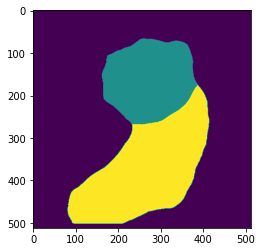

In [9]:
selected_masks = rsp.Cellpose(video= tensor_video_expanded[0,:,:,1], num_iterations = 4, channels = [0,0], diameter = 100, model_type = 'cyto', selection_method = 'max_cells').calculate_masks() # options are 'max_area' or 'max_cells'
plt.imshow(selected_masks)

In [10]:
#for i,vid in enumerate(list_videos):
#    rsp.Plots.plot_image_channels(vid,selected_time_point = 0)

# Tracking

In [11]:
selected_channel_tracking = 0
selected_channel_segmentation = 1
intensity_calculation_method = 'disk_donut'  # options are : 'total_intensity' and 'disk_donut' 'gaussian_fit'
mask_selection_method = 'all_cells_in_image'           # options are : 'all_cells_in_image', 'max_spots' and 'max_area' 
use_optimization_for_tracking = 1            # 0 not using, 1 is using optimization
min_percentage_time_tracking = 0.1            # (normalized) minimum time to consider a trajectory.
particle_detection_size = 7                  # spot size for the simulation and tracking.
selected_channel = 0                         # Selected channel for tracking
average_cell_diameter = 200                    # cell diameter
intensity_threshold_tracking = None          # intensity threshold. If None, the code uses automatic detection # 
real_positions_dataframe = None #pd.read_csv(video_dir.joinpath('both_base_pb_KDM5B_P300_0.06_5.33333_video_cell_0.csv'))

In [12]:
#import trackpy as tp


In [13]:
#tp.locate(self.video_filtered[0, :, :], self.particle_size, minmass = 1, max_iterations = 100, preprocess = False, percentile = 70)

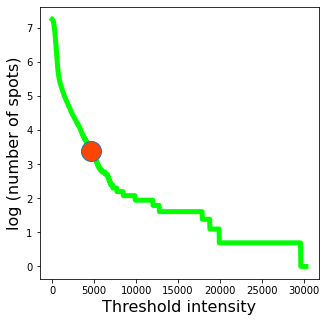

The number of detected trajectories is:  8
The selected intensity threshold is:  4634.0 



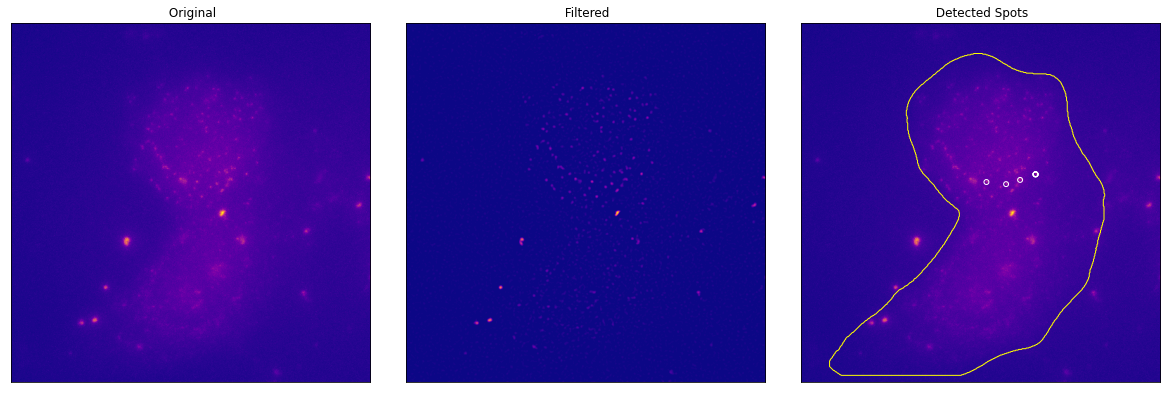

In [14]:
list_DataFrame_tracking, list_array_intensities, list_time_vector, list_selected_mask = rsp.image_processing( video =selected_video,#files_dir_path_processing=video_dir,
                                                                                                            particle_size=particle_detection_size,
                                                                                                            selected_channel_tracking = selected_channel_tracking,
                                                                                                            selected_channel_segmentation = selected_channel_segmentation,
                                                                                                            intensity_calculation_method =intensity_calculation_method, 
                                                                                                            mask_selection_method = mask_selection_method,
                                                                                                            show_plot=True,
                                                                                                            use_optimization_for_tracking=use_optimization_for_tracking,
                                                                                                            real_positions_dataframe = real_positions_dataframe,
                                                                                                            average_cell_diameter=average_cell_diameter,
                                                                                                            print_process_times=False,
                                                                                                            min_percentage_time_tracking=min_percentage_time_tracking,
                                                                                                            dataframe_format='long')

In [15]:
df =list_DataFrame_tracking[0]


In [16]:
df.head()

,image_number,cell_number,particle,frame,ch0_int_mean,ch1_int_mean,ch2_int_mean,ch0_int_std,ch1_int_std,ch2_int_std,...,y,ch0_SNR,ch1_SNR,ch2_SNR,ch0_bg_int_mean,ch1_bg_int_mean,ch2_bg_int_mean,ch0_bg_int_std,ch1_bg_int_std,ch2_bg_int_std
0,0,0,0,0,1004.25,137.39,0.0,1088.93,974.17,0.0,...,229,2.83,0.19,NaN,3388.30,6124.06,0.0,354.92,721.28,0.0
1,0,0,0,1,840.79,255.45,0.0,1097.78,1136.37,0.0,...,229,2.35,0.38,NaN,3432.64,6176.06,0.0,357.92,670.47,0.0
2,0,0,0,2,771.04,47.34,0.0,1127.67,778.16,0.0,...,230,2.11,0.07,NaN,3389.24,6057.12,0.0,365.57,665.52,0.0
3,0,0,0,3,869.46,-106.13,0.0,1157.22,692.53,0.0,...,229,2.54,-0.12,NaN,3295.78,6047.11,0.0,341.90,857.89,0.0
4,0,0,0,4,1041.77,237.93,0.0,1319.95,930.73,0.0,...,229,2.77,0.33,NaN,3381.84,6062.09,0.0,375.62,718.48,0.0


In [17]:
df.tail()

,image_number,cell_number,particle,frame,ch0_int_mean,ch1_int_mean,ch2_int_mean,ch0_int_std,ch1_int_std,ch2_int_std,...,y,ch0_SNR,ch1_SNR,ch2_SNR,ch0_bg_int_mean,ch1_bg_int_mean,ch2_bg_int_mean,ch0_bg_int_std,ch1_bg_int_std,ch2_bg_int_std
746,0,0,7,217,-449.59,-64.09,0.0,415.90,589.96,0.0,...,202,-0.37,-0.08,NaN,3929.02,6505.54,0.0,1218.39,761.59,0.0
747,0,0,7,218,-206.97,43.85,0.0,398.02,522.96,0.0,...,205,-0.28,0.05,NaN,3516.28,6131.09,0.0,726.55,860.63,0.0
748,0,0,7,220,-47.14,-171.65,0.0,449.63,512.58,0.0,...,202,-0.09,-0.23,NaN,3527.47,6435.79,0.0,518.11,755.63,0.0
749,0,0,7,222,-63.07,67.32,0.0,471.83,528.63,0.0,...,202,-0.11,0.10,NaN,3440.01,6187.68,0.0,598.09,690.42,0.0
750,0,0,7,224,51.63,44.71,0.0,550.83,591.24,0.0,...,200,0.08,0.06,NaN,3419.02,6186.63,0.0,646.95,804.14,0.0
